In [2]:
import numpy as np
import glob
from IPython.display import Image, display
import matplotlib.pyplot as plt

cosmosis="/home/cz136/project/technical/cosmosis/"
plots=cosmosis+"plots/"
output=cosmosis+"output/"
demos=cosmosis+"demos/"
lcdm="$\Lambda$CDM"

In [3]:
def iter_plots(path):
    for imageName in glob.glob(path): #assuming JPG
        display(Image(filename=imageName))
        yield imageName

# CosmoSIS Report 

## Demos

### demo1

demo1.int input the standard cosmology values in value1.ini to CAMB code and output power spectra in CMB, cosmological parameters, distances as functions of redshift, and linear power spectrum. Then Halofit read the parameters and the output from CAMB to calculate non-linear matter power spectrum.

In [4]:
value1=demos+"values1.ini"

In [5]:
demo1=iter_plots(plots+"demo1*.png")

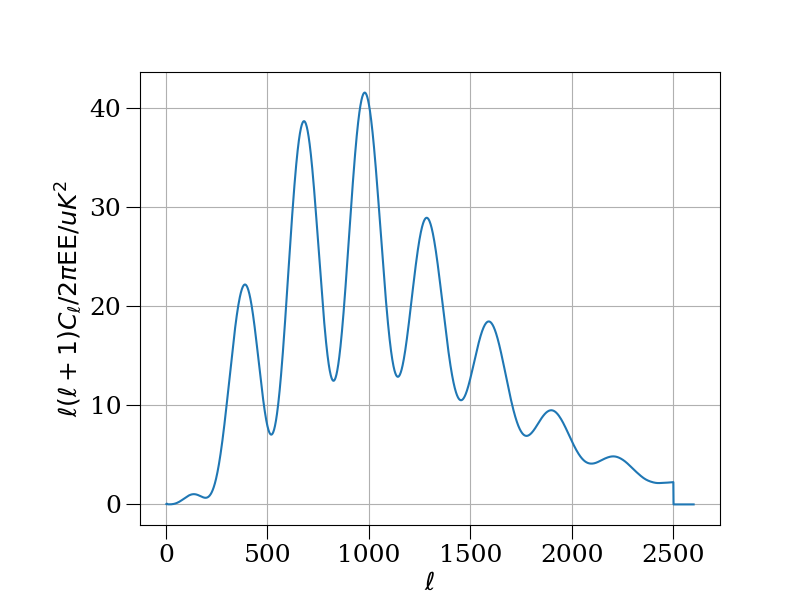

'/home/cz136/project/technical/cosmosis/plots/demo1_ee.png'

In [6]:
next(demo1)

This is E-mode CMB polarization power spectrum.

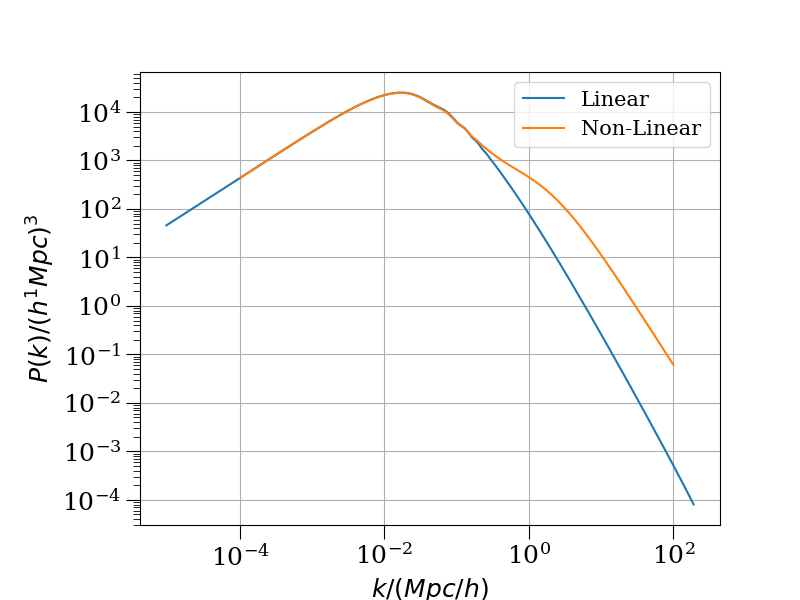

'/home/cz136/project/technical/cosmosis/plots/demo1_matter_power.png'

In [7]:
next(demo1)

This is the linear and non-linear matter power spectrum calculated from the parameters. The linear one is calculated from CAMB and the non-linear one is calculated from Halofit.

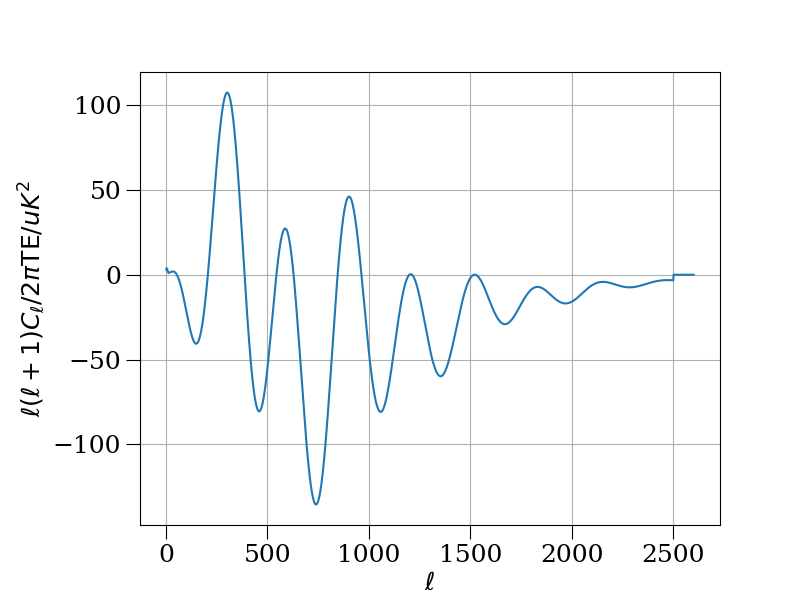

'/home/cz136/project/technical/cosmosis/plots/demo1_te.png'

In [8]:
next(demo1)

This is the temperature-E-mode cross-correlation power spectrum of CMB.

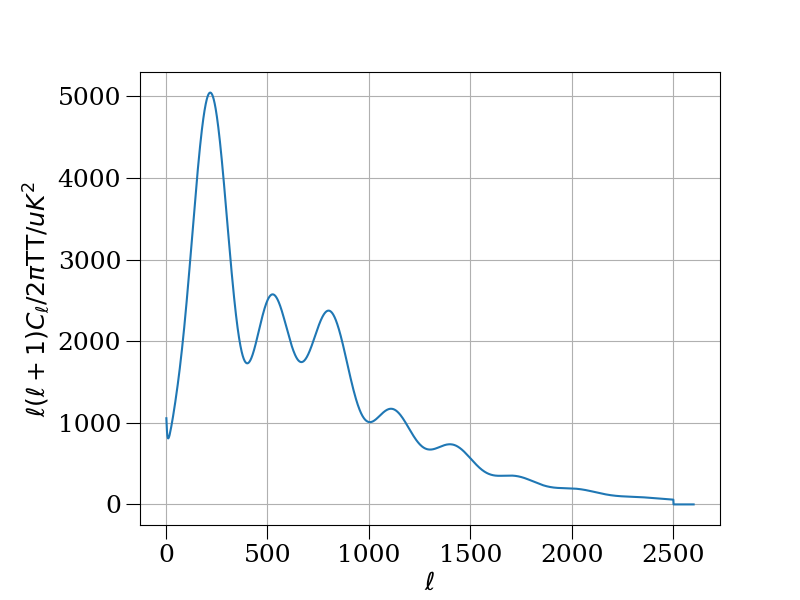

'/home/cz136/project/technical/cosmosis/plots/demo1_tt.png'

In [9]:
next(demo1)

This is the CMB temperature power spectrum we talked about in class.

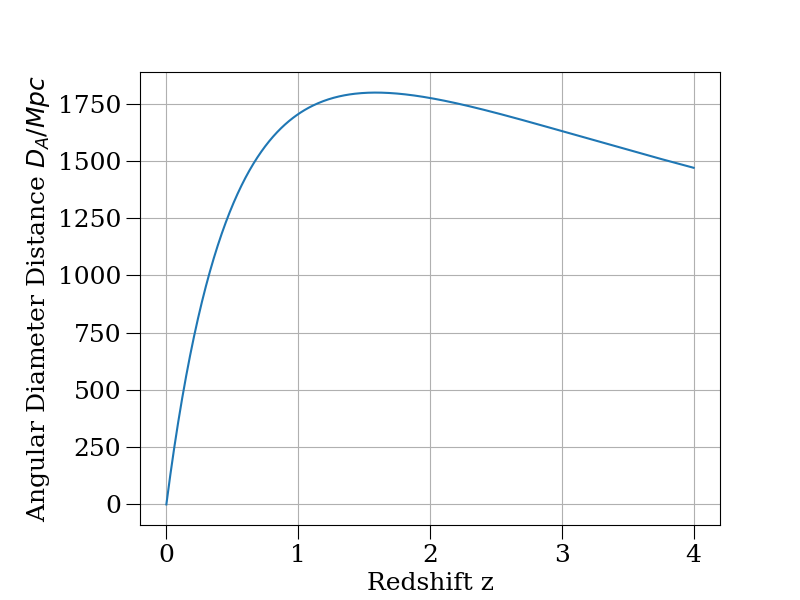

'/home/cz136/project/technical/cosmosis/plots/demo1_angular_distance.png'

In [10]:
next(demo1)

This is the angular diameter distance in standard cosmology. 

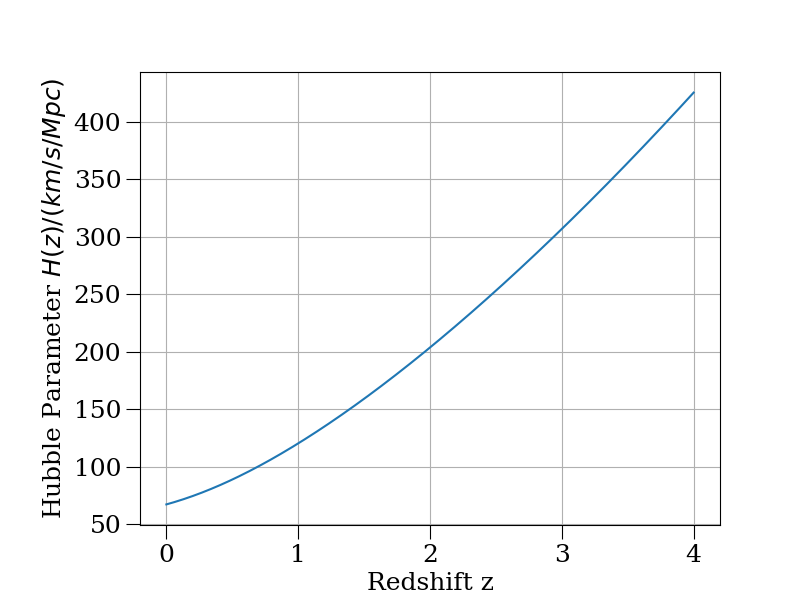

'/home/cz136/project/technical/cosmosis/plots/demo1_hubble.png'

In [11]:
next(demo1)

Hubble parameter as a function of redshift

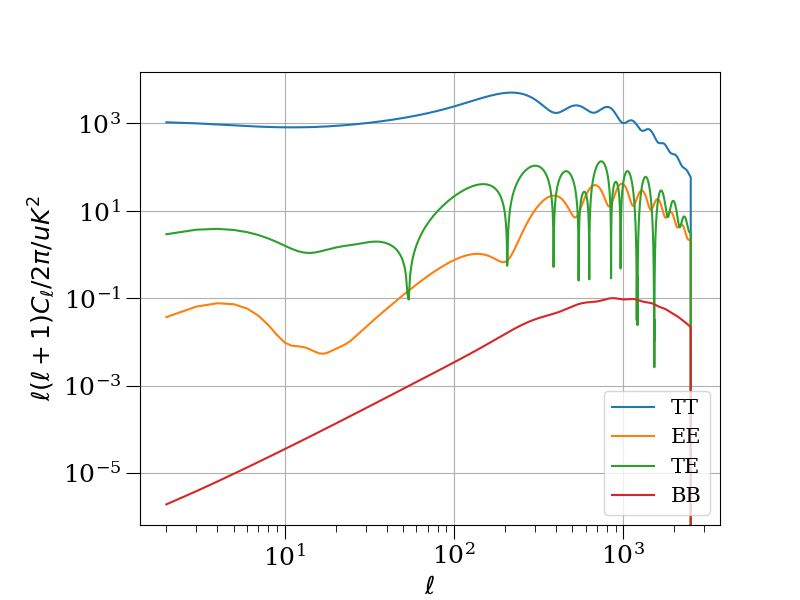

'/home/cz136/project/technical/cosmosis/plots/demo1_grand.png'

In [12]:
next(demo1)

CMB power spectra.

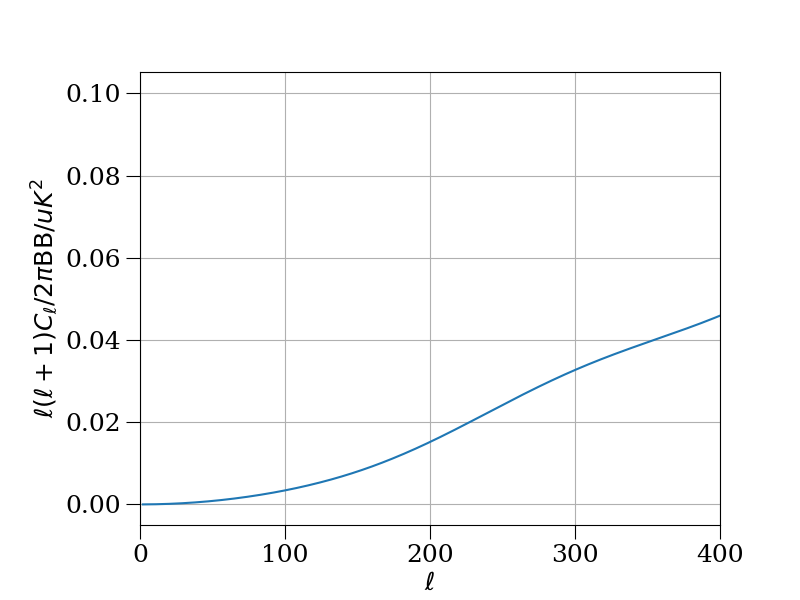

'/home/cz136/project/technical/cosmosis/plots/demo1_bb.png'

In [13]:
next(demo1)

CMB B-mode auto-correlation.

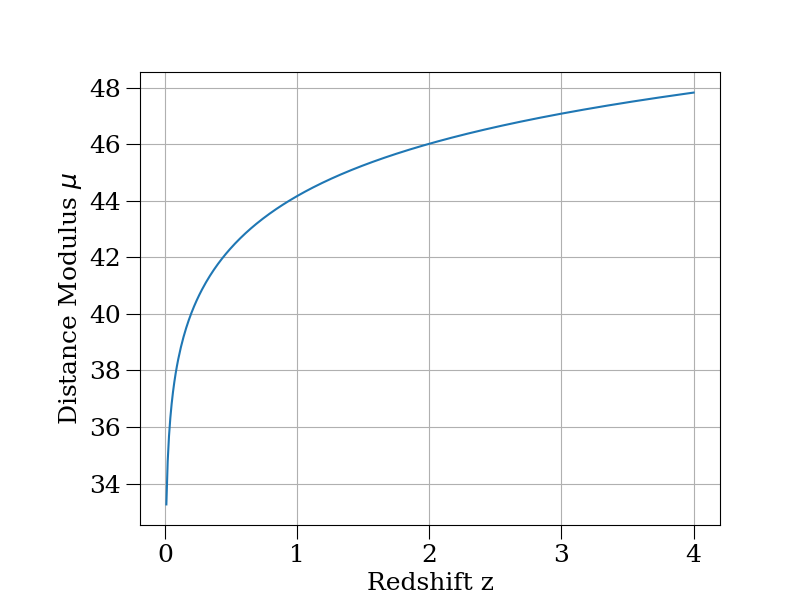

'/home/cz136/project/technical/cosmosis/plots/demo1_distance_modulus.png'

In [14]:
next(demo1)

Distance modulus $m-M$ as a function fo redshift

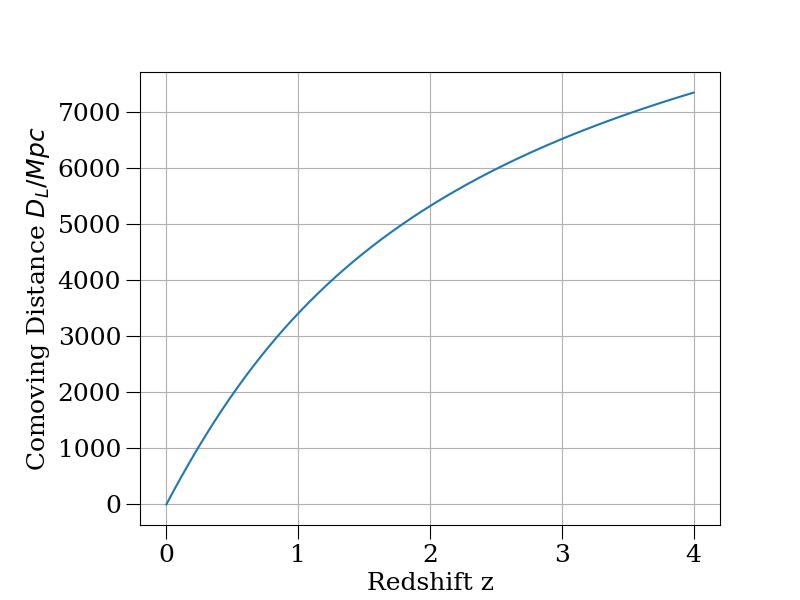

'/home/cz136/project/technical/cosmosis/plots/demo1_comoving_distance.png'

In [15]:
next(demo1)

The comoving radial distance from us to objects at redshift $z$

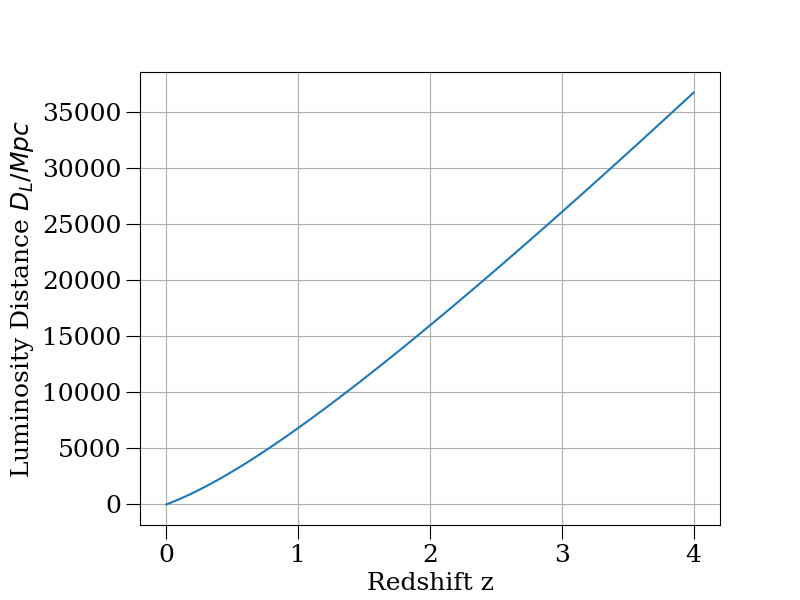

'/home/cz136/project/technical/cosmosis/plots/demo1_luminosity_distance.png'

In [16]:
next(demo1)

Lumiosity distance from us to a standard candle at redshift $z$

## demo2

demo2 does basically the same thing as demo1 but with parameters about neutrino and tensor perturbations and without Halofit. In addition, it compares the result of the simulation with Planck and BICEP data and yields likelihood values.

```
bicep_like = -3.2713736364823296  
planck2015_like = -1726.9467265163364
```

## demo3

demo3 expand the parameter space of $r_T$ to the interval $[0,0.5]$, and then CosmoSIS calcualte the likelihood of the parameter and put constraints on the parameter with BICEP data.

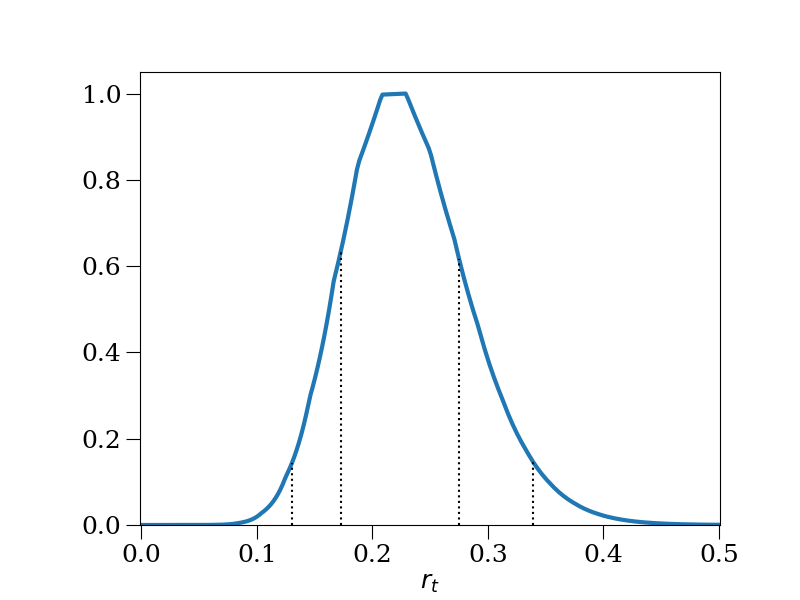

In [17]:
display(Image(filename=plots+"demo3_cosmological_parameters--r_t.png"))

One additional plot generated by demo3 is the relative likihood of the parameter given BICEP data.

The statistics of the parameter are:

```
Marginalized mean, std-dev:
    cosmological_parameters--r_t = 0.231287 ± 0.0544917

Marginalized median, std-dev:
    cosmological_parameters--r_t = 0.216831 ± 0.0544917

Best likelihood:
    cosmological_parameters--r_t = 0.229167
    prior = 0.693147
    post = -2.85609
```

## demo4

demo4 does similar things as demo3 but with 5 parameter and a different sampler, maxlike. The most likely values for `cosmological_parameters--omega_m   cosmological_parameters--h0 cosmological_parameters--omega_b    cosmological_parameters--a_s    cosmological_parameters--n_s` are 

`0.14161103899324978   0.02225223756479768   0.6800918515177078   0.9651390758410499   2.2027452026774598e-09`

## demo5

demo5 uses Markov chain Monte Carlo analysis to estimate the likelyhood of cosmology and supernova light curve to distance parameters. The data we are using are from SDSS-II/SNLS3. The samples are saved in demo5.txt.

With postprocess, we get histogram plots as shown below:

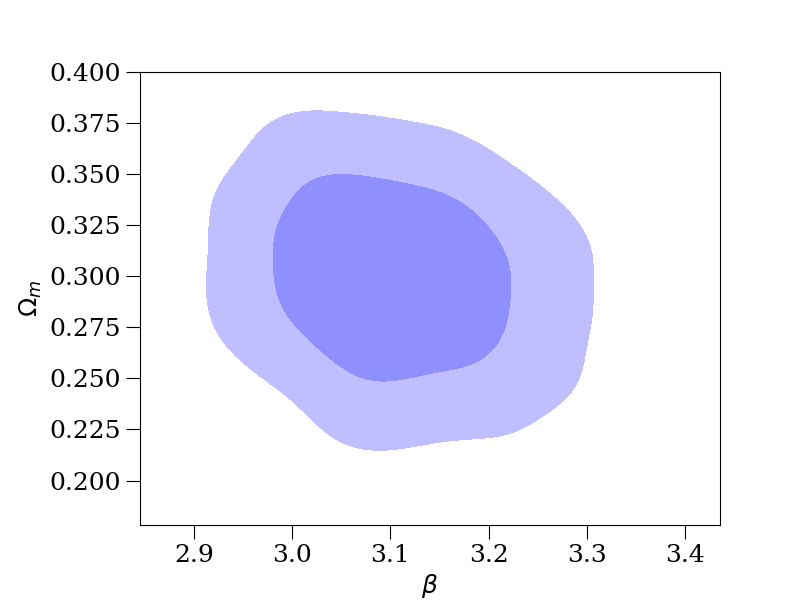

In [18]:
display(Image(filename=plots+"demo5_2D_supernova_params--beta_cosmological_parameters--omega_m.png"))

The contours are 68% and 95% likelihood.

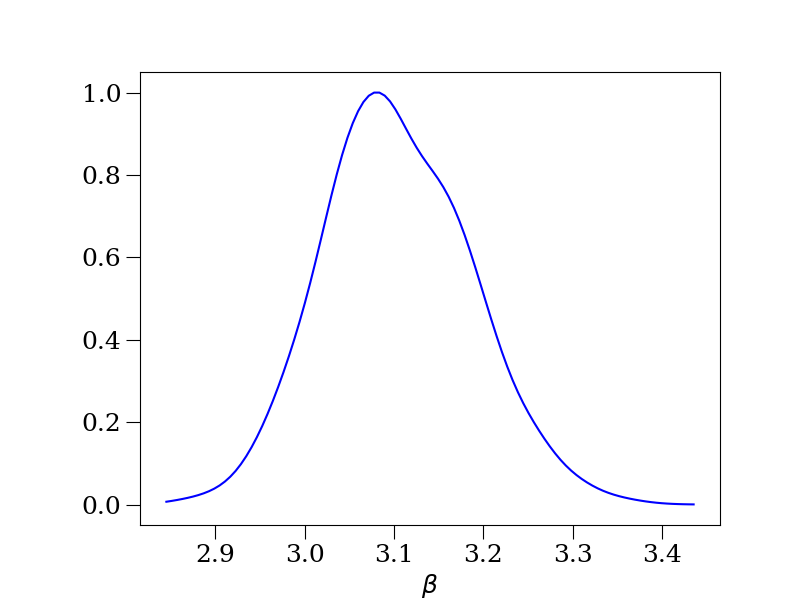

In [19]:
display(Image(filename=plots+"demo5_supernova_params--beta.png"))

## demo7

demo7 uses grid to generate a grid of parameters and then calculate the likelihood of each point on the grid. The axes of the grid are $\sigma_8$ and $\Omega_m$. And the output plot looks like this

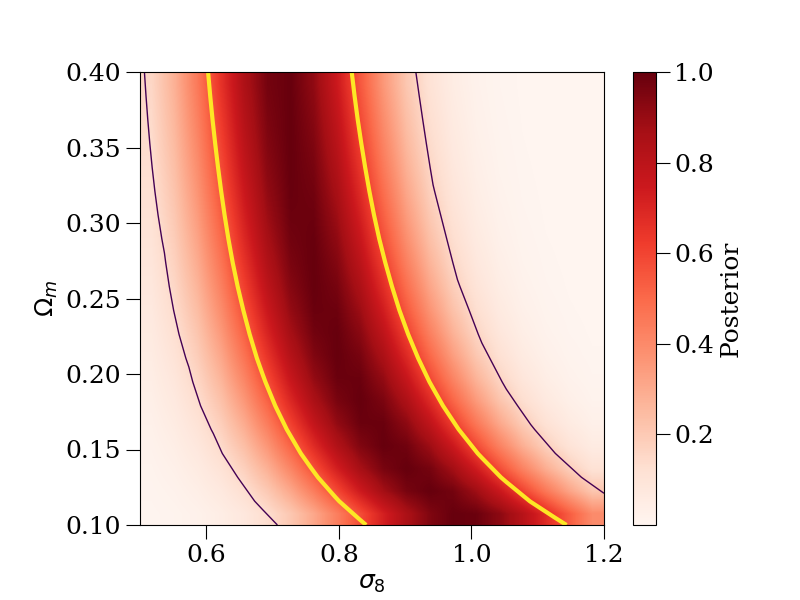

In [20]:
display(Image(filename=plots+"demo7_2D_cosmological_parameters--sigma_8_cosmological_parameters--omega_m.png"))

```
Marginalized mean, std-dev:
    cosmological_parameters--omega_m = 0.241955 ± 0.0915885
    cosmological_parameters--sigma_8 = 0.802542 ± 0.141301

Marginalized median, std-dev:
    cosmological_parameters--omega_m = 0.229923 ± 0.0915885
    cosmological_parameters--sigma_8 = 0.774403 ± 0.141301

Best likelihood:
    cosmological_parameters--omega_m = 0.178947
    cosmological_parameters--sigma_8 = 0.831579
    prior = 1.56065
    post = 3.35978
```

# Baryon only universe

I tried to follow Valentino et al. 2019 and set all parameters in accordance with Planck18 but with $\Omega_k =-0.0438$ but cosmosis won't take negative $\Omega_k$ for some reason. So I set the baryon density today to be $\Omega_b=0.3140$. 

In [21]:
output=cosmosis+"output/alt/"
output1=cosmosis+"output/demo1/"

distance_dir=output+"distances/"
distance_dir1=output1+"distances/"

name_dict={"d_l":"Luminosity Distance $D_L / Mpc$","d_a":"Angular Diameter Distance $D_A / Mpc$","d_m":"Comoving Distance $D_L / Mpc$",
          "mu":"Distance Modulus $\\mu$","z":"Redshift z","h":"Hubble Parameter $H(z) / (km/s/Mpc)$"}

Text(0, 0.5, 'Angular Diameter Distance $D_A / Mpc$')

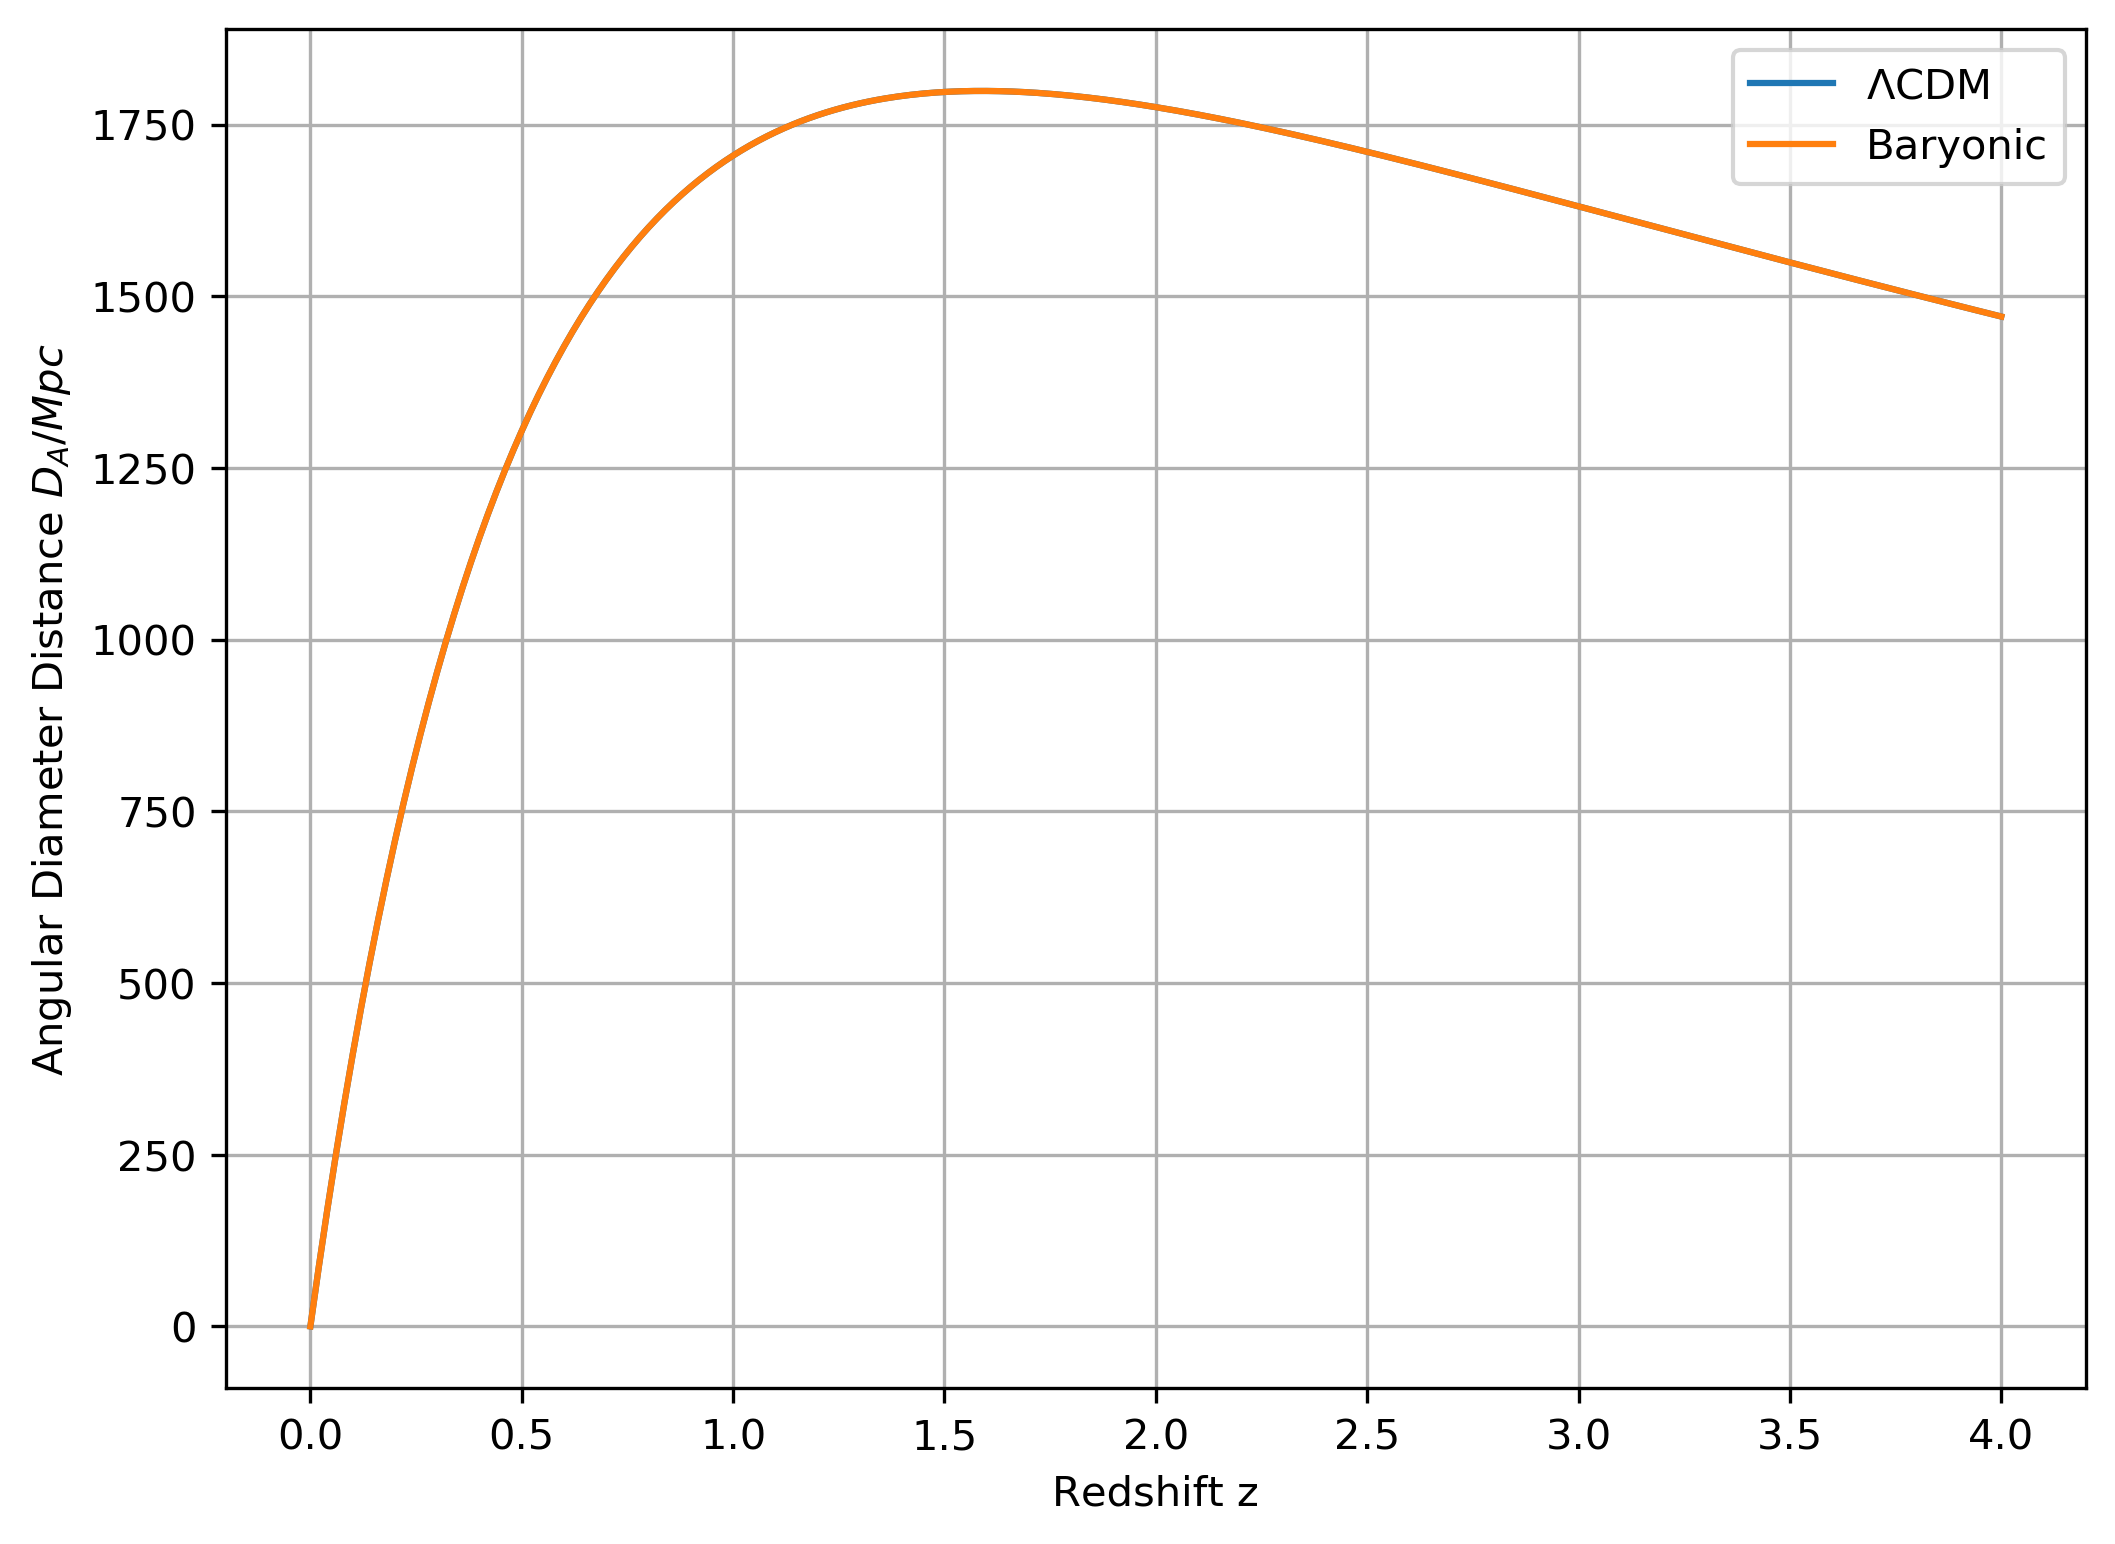

In [22]:
fig, ax = plt.subplots(figsize=(8,6),dpi=300)
ax.plot(np.loadtxt(distance_dir+"z.txt"),np.loadtxt(distance_dir+"d_a.txt"),label="$ \Lambda$CDM")
ax.plot(np.loadtxt(distance_dir1+"z.txt"),np.loadtxt(distance_dir1+"d_a.txt"),label="Baryonic")
ax.grid()
ax.legend()
ax.set_xlabel(name_dict["z"])
ax.set_ylabel(name_dict["d_a"])

Text(0, 0.5, 'Distance Modulus $\\mu$')

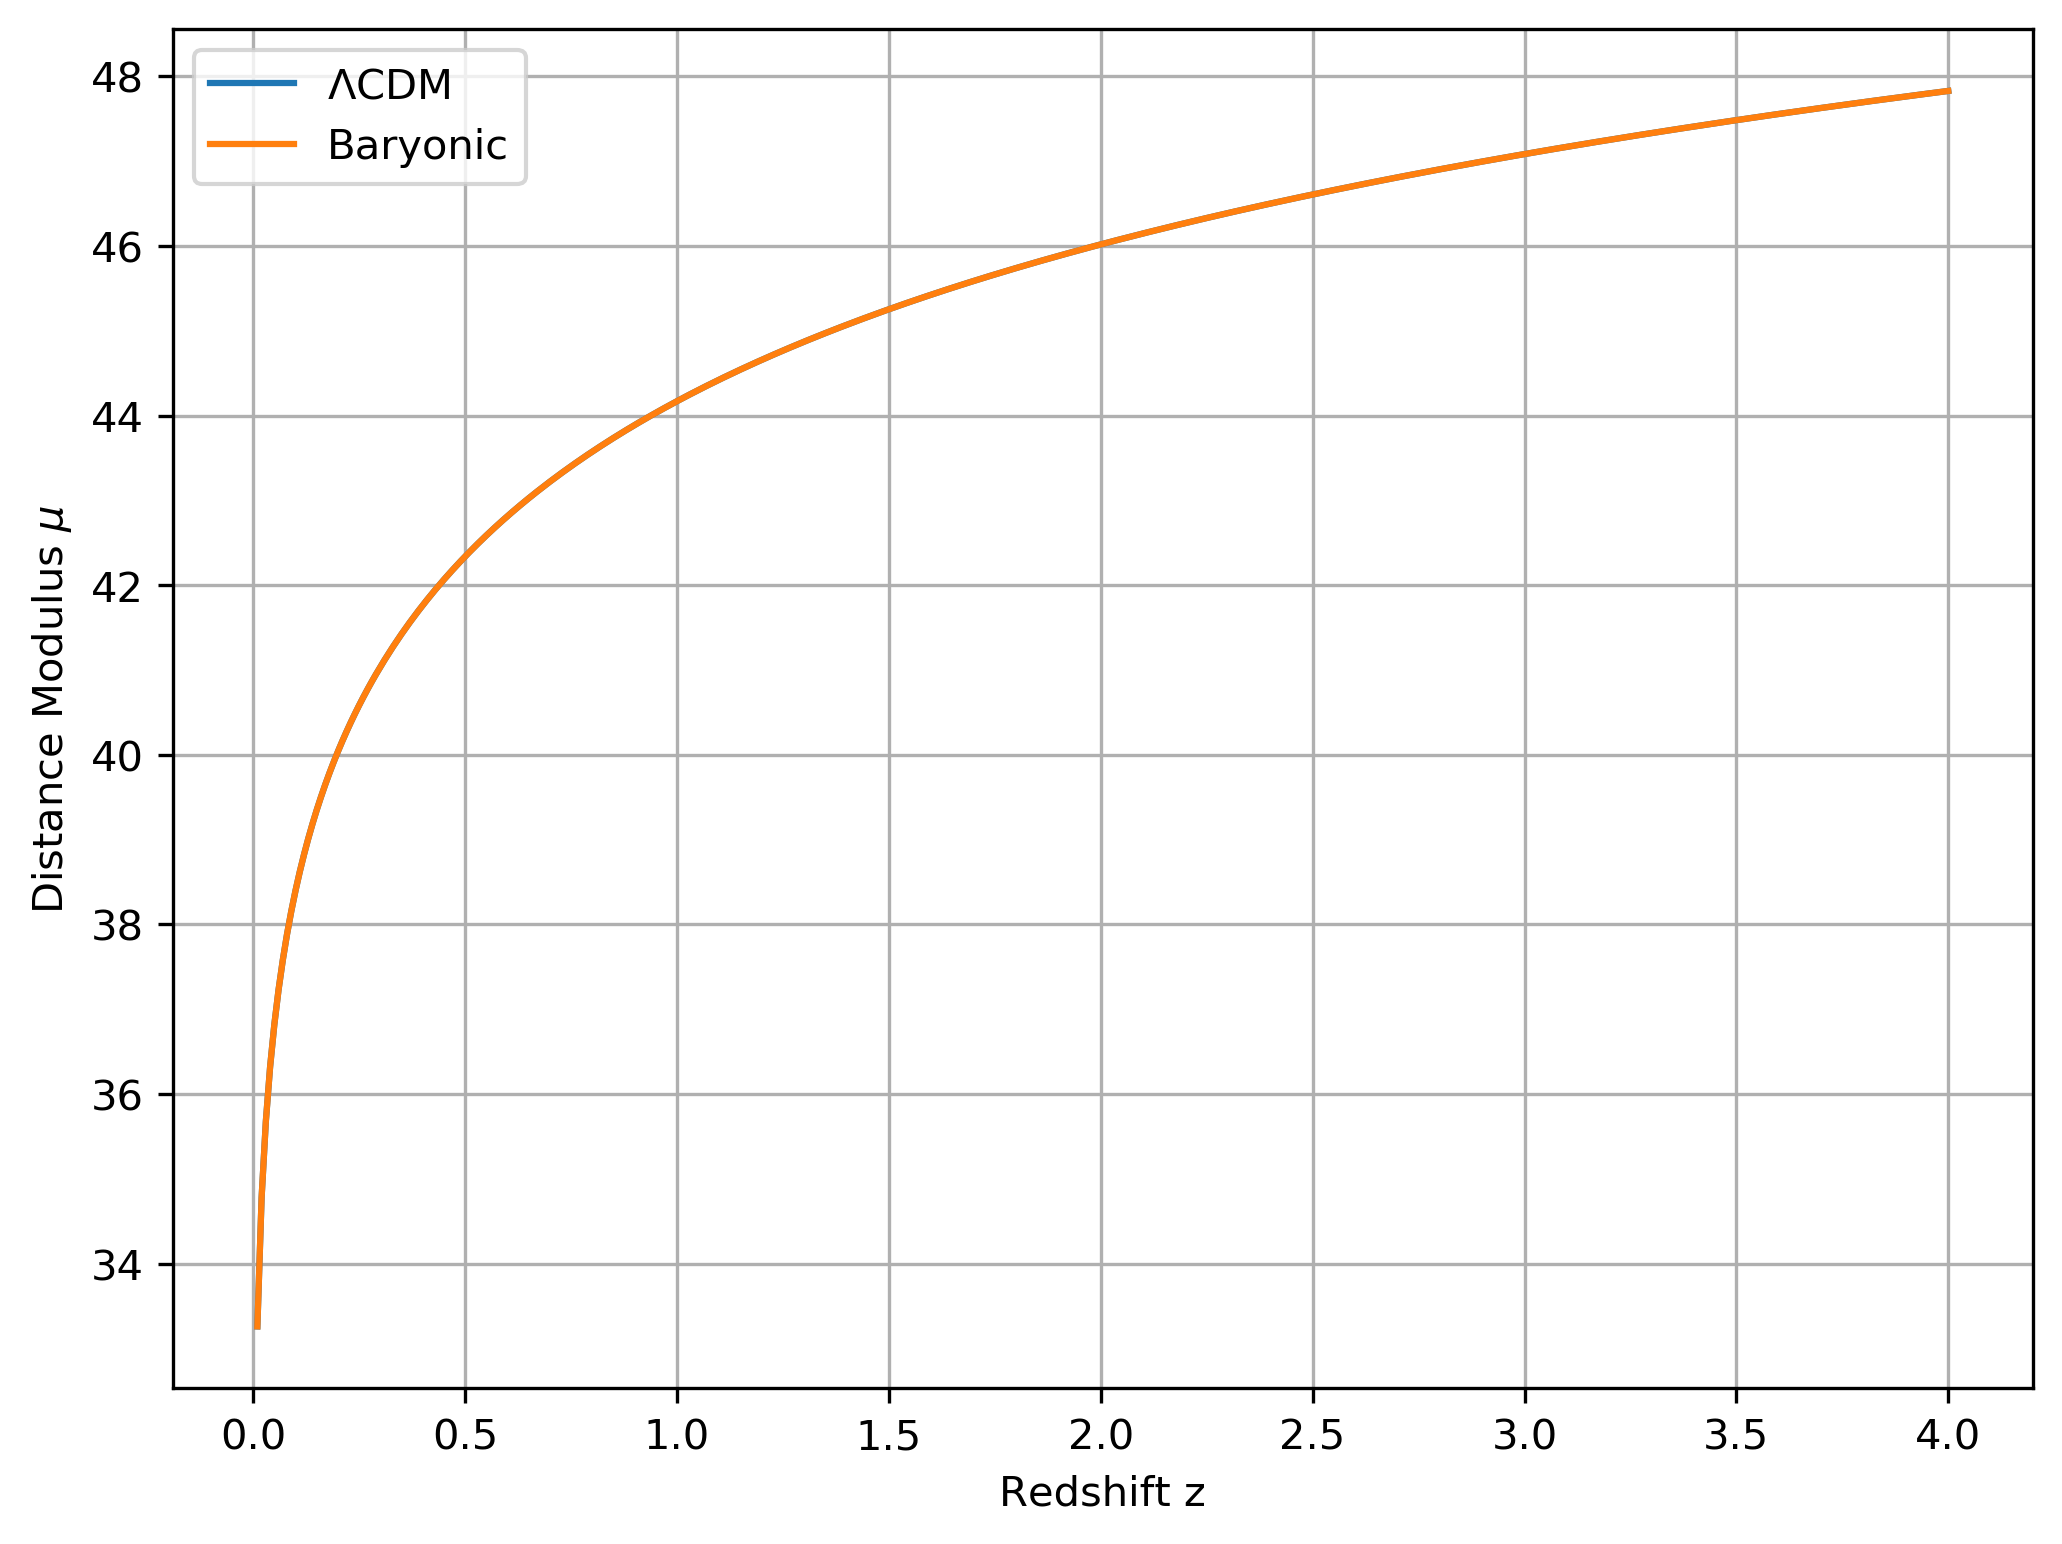

In [23]:
var="mu"
fig, ax = plt.subplots(figsize=(8,6),dpi=300)
ax.plot(np.loadtxt(distance_dir+"z.txt"),np.loadtxt(distance_dir+var+".txt"),label="$ \Lambda$CDM")
ax.plot(np.loadtxt(distance_dir1+"z.txt"),np.loadtxt(distance_dir1+var+".txt"),label="Baryonic")
ax.grid()
ax.legend()
ax.set_xlabel(name_dict["z"])
ax.set_ylabel(name_dict[var])

Text(0, 0.5, 'Hubble Parameter $H(z) / (km/s/Mpc)$')

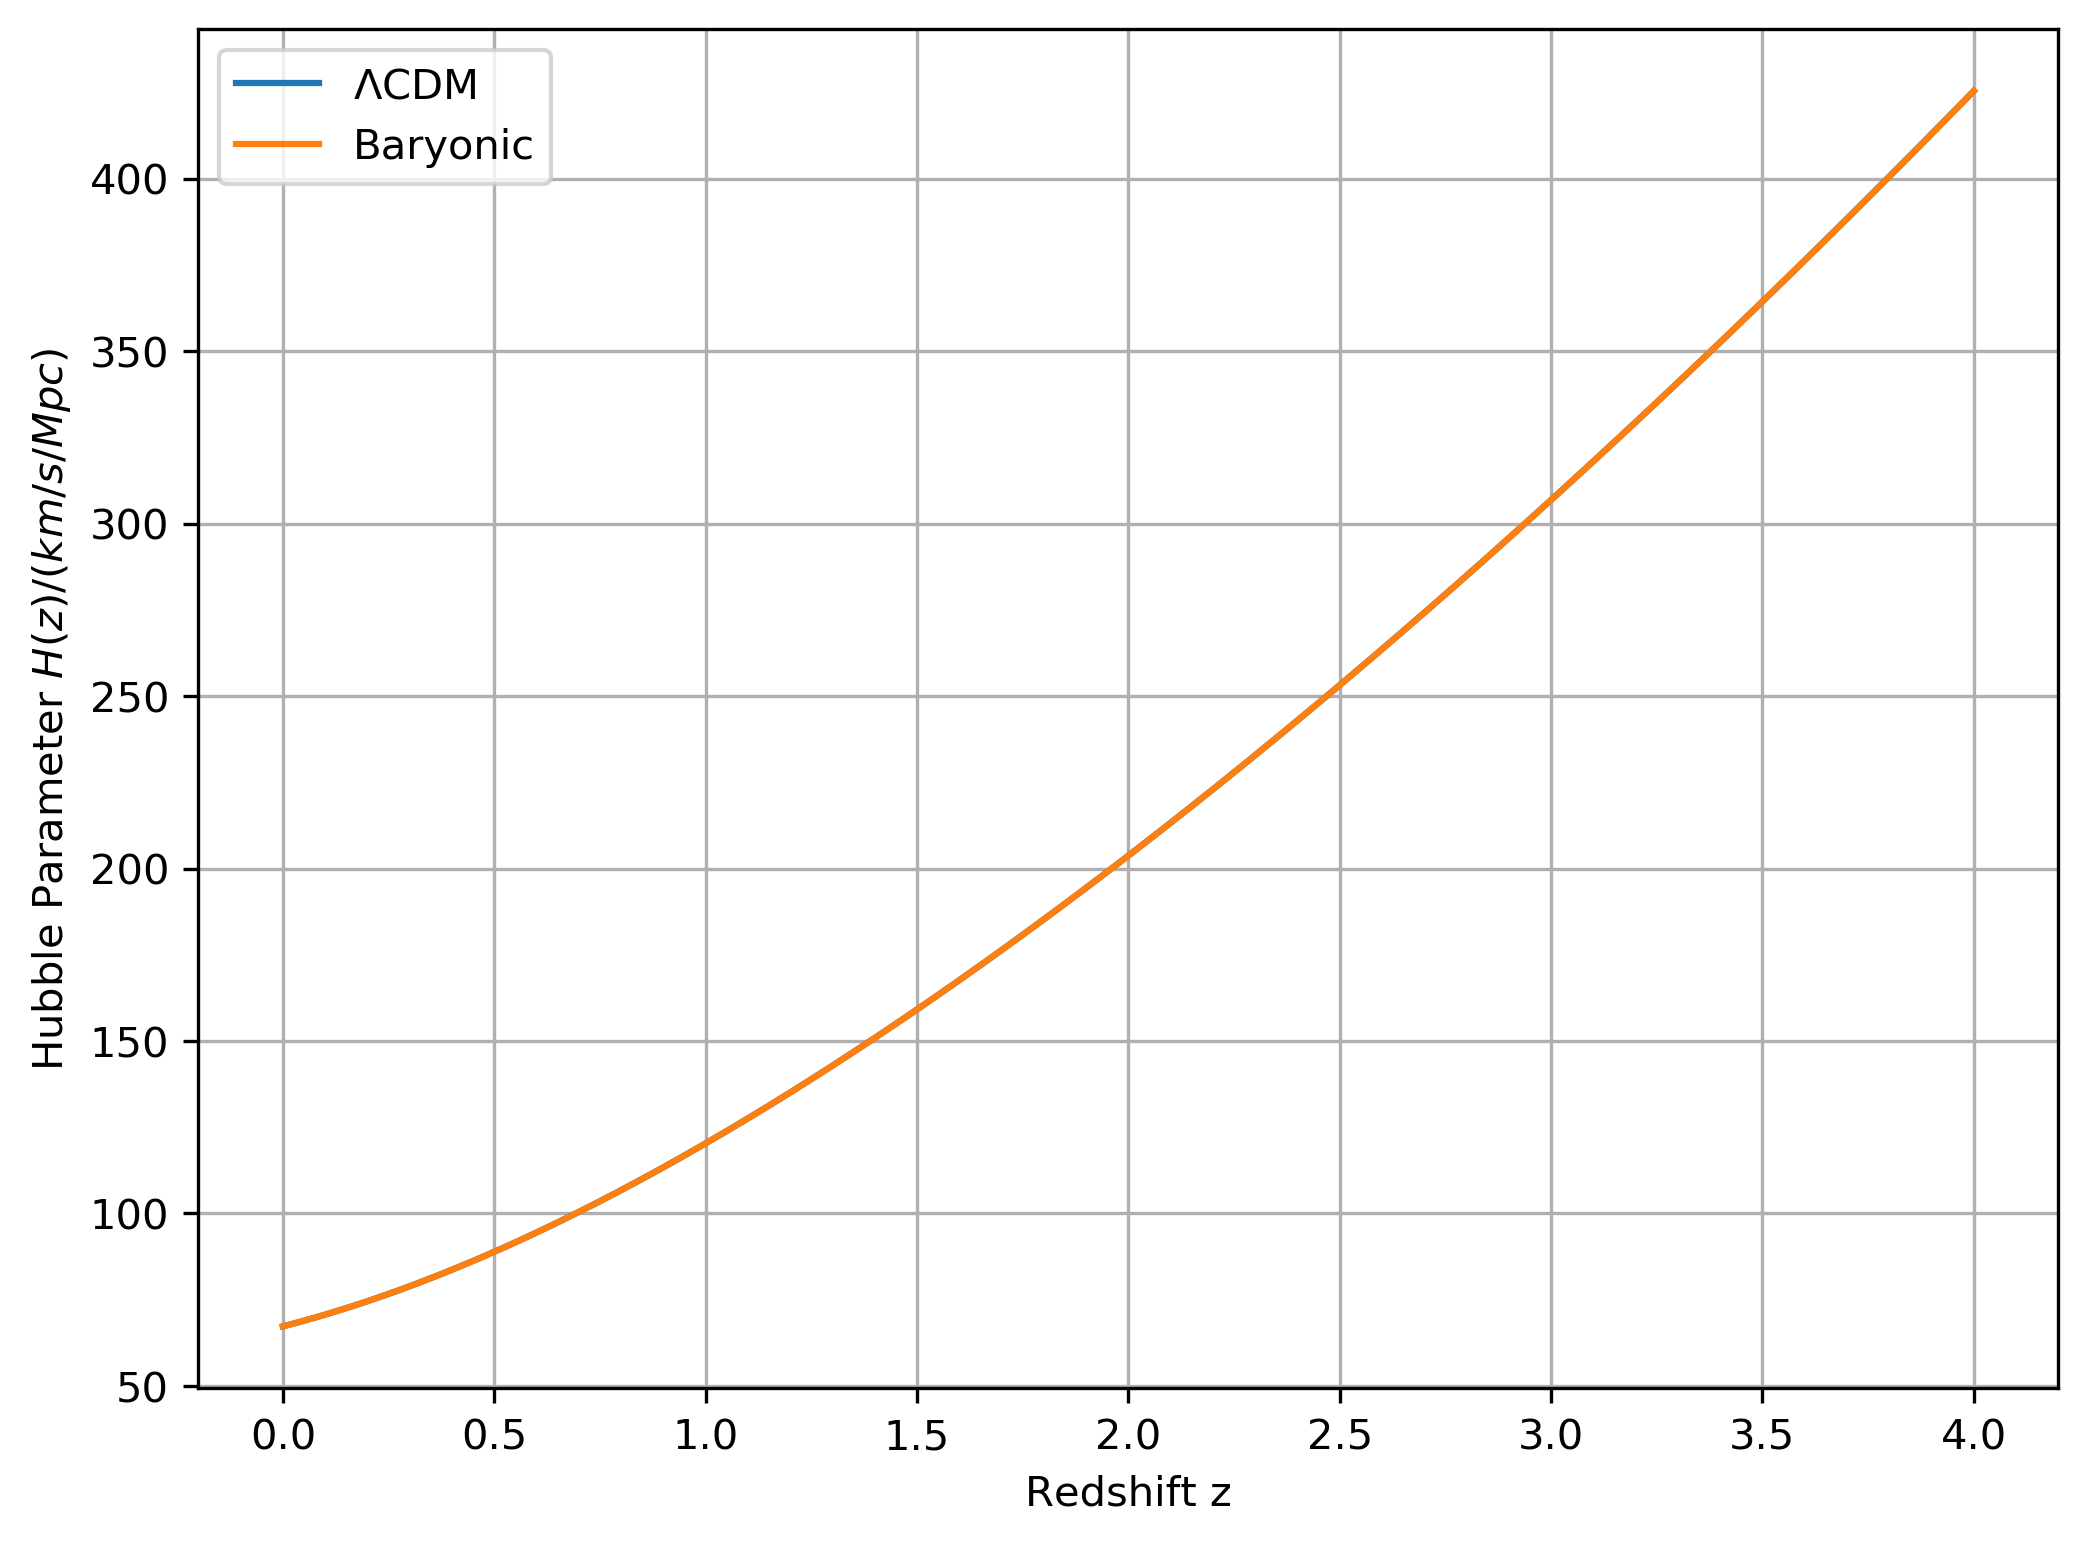

In [24]:
var="h"
scaling = 2.99792458e+05
fig, ax = plt.subplots(figsize=(8,6),dpi=300)
ax.plot(np.loadtxt(distance_dir+"z.txt"),np.loadtxt(distance_dir+var+".txt")*scaling,label="$ \Lambda$CDM")
ax.plot(np.loadtxt(distance_dir1+"z.txt"),np.loadtxt(distance_dir1+var+".txt")*scaling,label="Baryonic")
ax.grid()
ax.legend()
ax.set_xlabel(name_dict["z"])
ax.set_ylabel(name_dict[var])

It makes sense that the distance measures are invariant with chagnes in $\Omega_0$, for $\Omega_\Lambda$ stays the same.

Text(0, 0.5, '$P(k) / (h^1 Mpc)^3$')

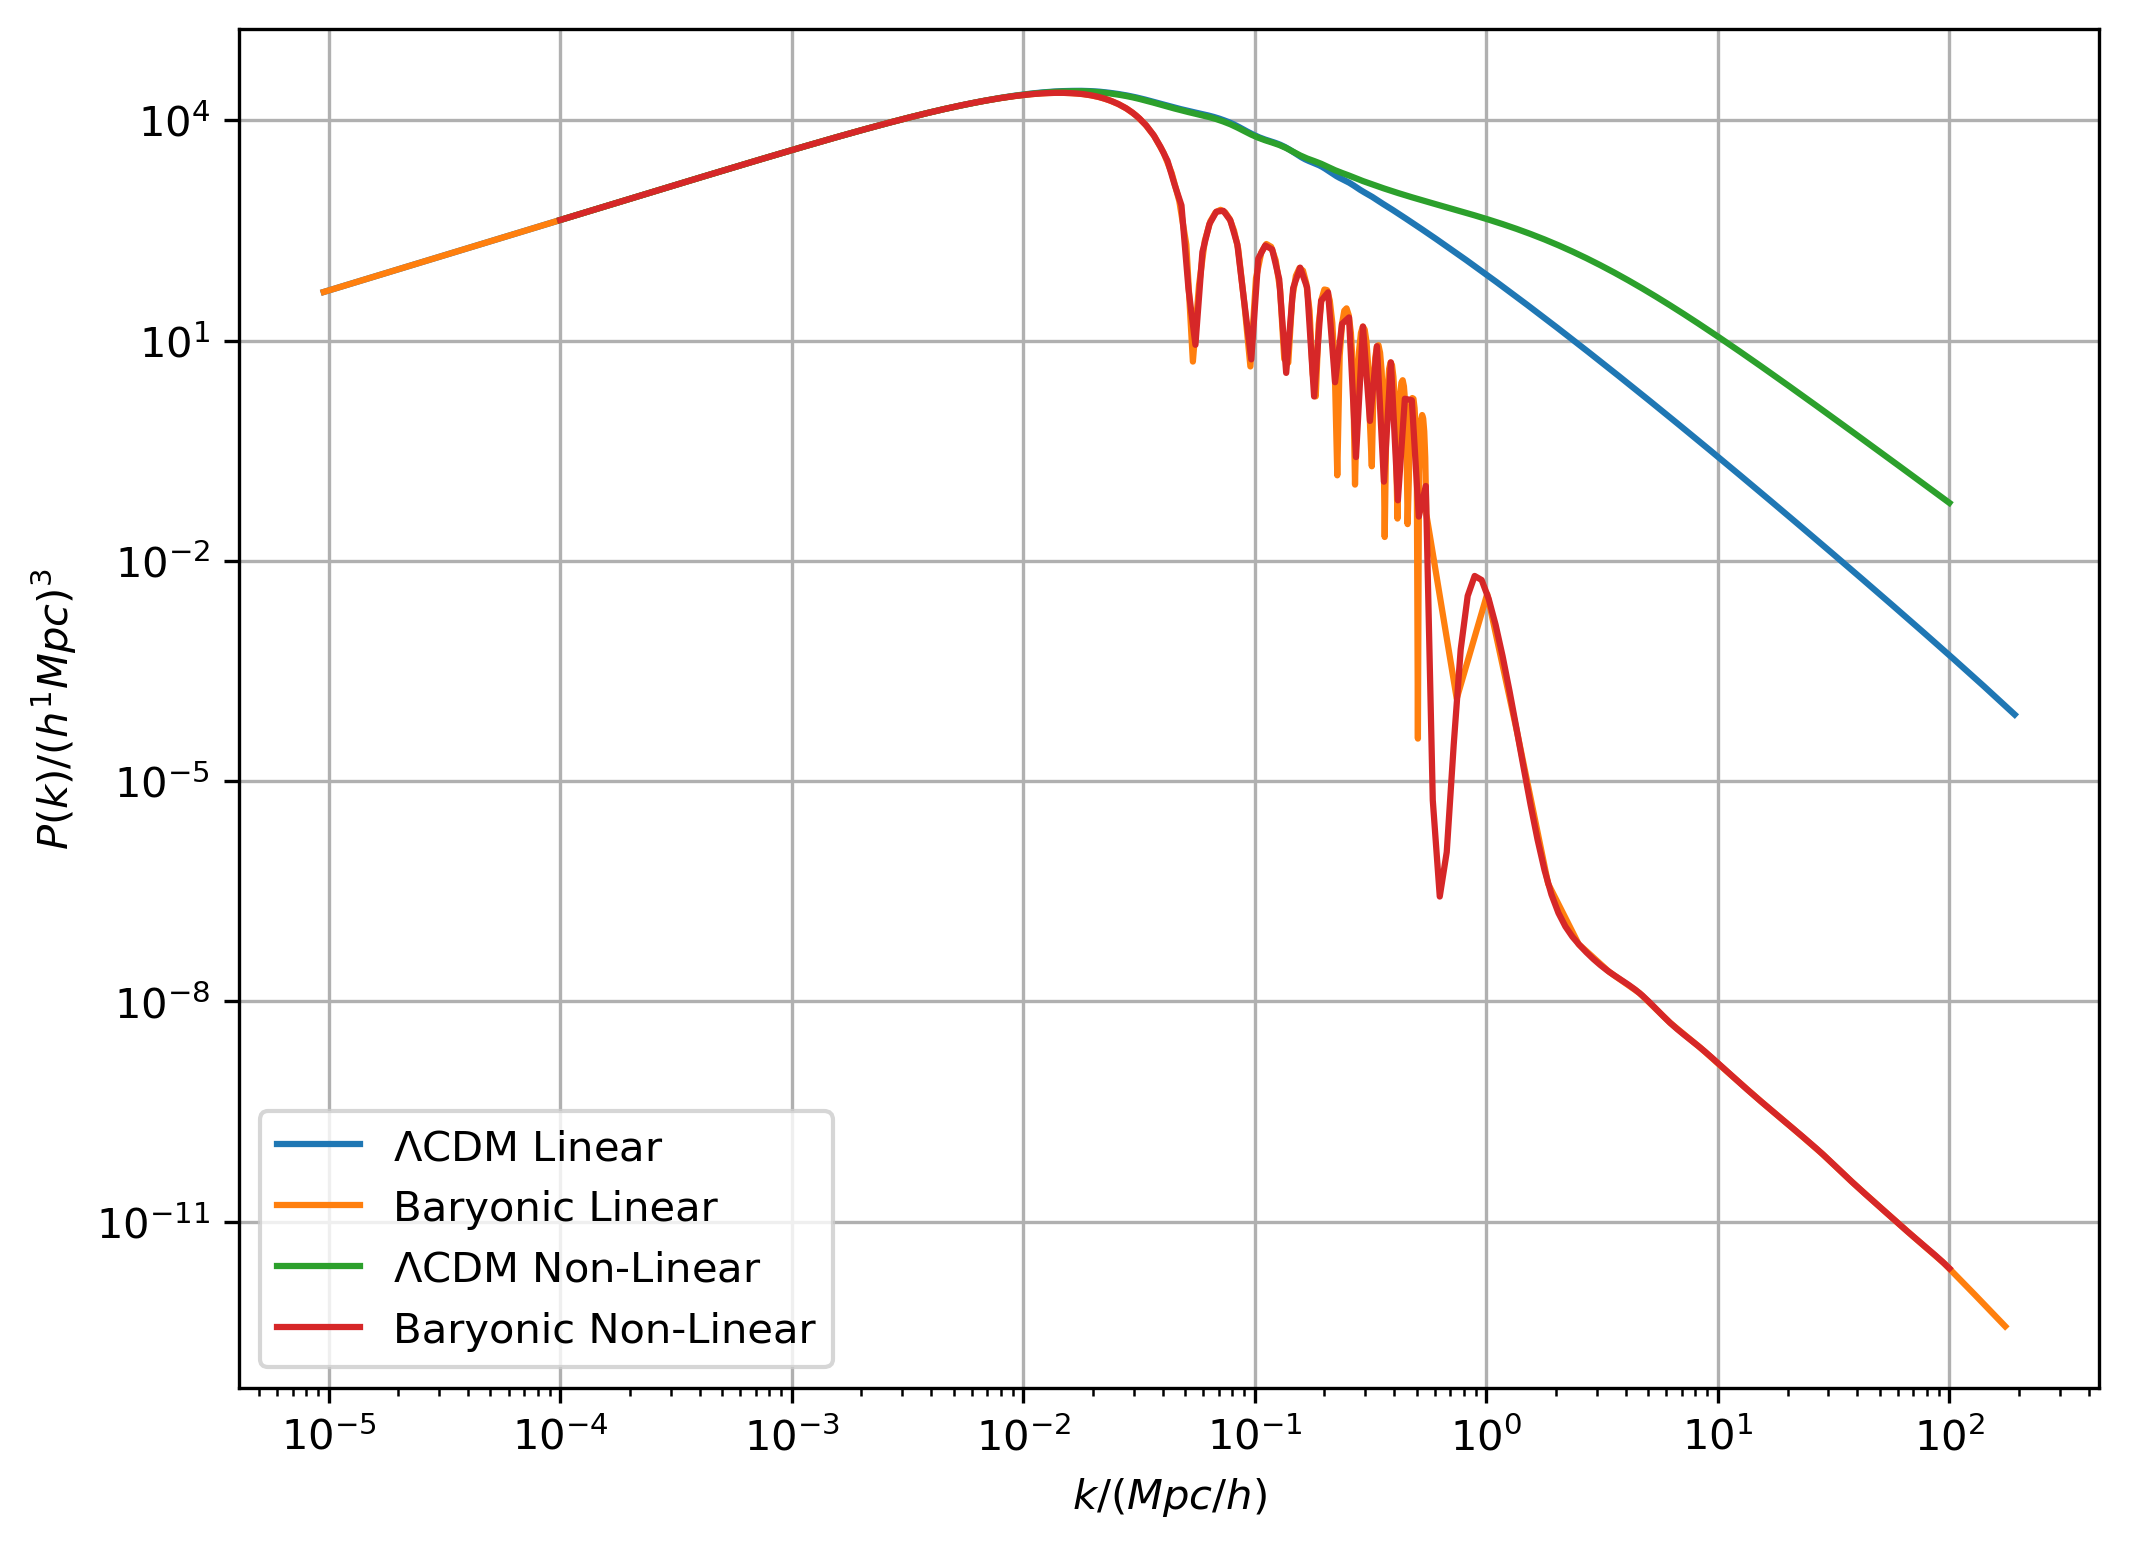

In [25]:
# var="h"
# scaling = 2.9979
# fig, ax = plt.subplots(figsize=(8,6),dpi=300)
# # ax.plot(np.loadtxt(output+"z.txt"),np.loadtxt(distance_dir+var+".txt")*scaling,label="$ \Lambda$CDM")
# ax.plot(,,label="Baryonic",log=True)
# ax.grid()
# ax.legend()


def plot_mps(path,label):

    kh =np.loadtxt(path+"k_h.txt")
    z = np.loadtxt(path+"z.txt")
    p = np.loadtxt(path+"p_k.txt")
    if (p<0).all(): p*=-1
    z = np.atleast_1d(z)
    kh = np.atleast_1d(kh)
    p = np.atleast_2d(p)
    nk = len(kh)
    nz = len(z)
    if p.shape==(nz,nk):
        p = p.T
    plt.loglog(kh, p[:,0], label=label)



# ax.grid()
# ax.legend()

fig, ax = plt.subplots(figsize=(8,6),dpi=300)
plot_mps(output1+"matter_power_lin/",lcdm+" Linear")
plot_mps(output+"matter_power_lin/","Baryonic"+" Linear")
plot_mps(output1+"matter_power_nl/",lcdm+" Non-Linear")
plot_mps(output+"matter_power_nl/","Baryonic"+" Non-Linear")
plt.legend()
ax.grid()
ax.set_xlabel("$k / (Mpc/h)$")
ax.set_ylabel("$P(k) / (h^1 Mpc)^3$")

It is not clear to me why the increase of the fraction of baryonic matter would produce oscillationsaround $k=0$.

## DES Data

### Cosmic Shear

In [26]:
data_dir=cosmosis+"data/test_output_dir/data_vector/"
data1_dir=cosmosis+"data1/test_output_dir/data_vector/"

In [27]:
angle=np.loadtxt(data_dir+"2pt_angle.txt")
bin1=np.loadtxt(data_dir+"2pt_bin1.txt")
bin2=np.loadtxt(data_dir+"2pt_bin2.txt")

bins = np.column_stack((bin1,bin2))


pt_data=np.loadtxt(data_dir+"2pt_data.txt")
pt_theory=np.loadtxt(data_dir+"2pt_theory.txt")
pt_theory1=np.loadtxt(data1_dir+"2pt_theory.txt")
pt_err=np.sqrt(np.diag(np.loadtxt(data1_dir+"2pt_covariance.txt")))
vec=np.column_stack((bins,angle,pt_data,pt_theory,pt_theory1,pt_err))


N=167

vec_p=vec[0:N]
vec_m=vec[N:]

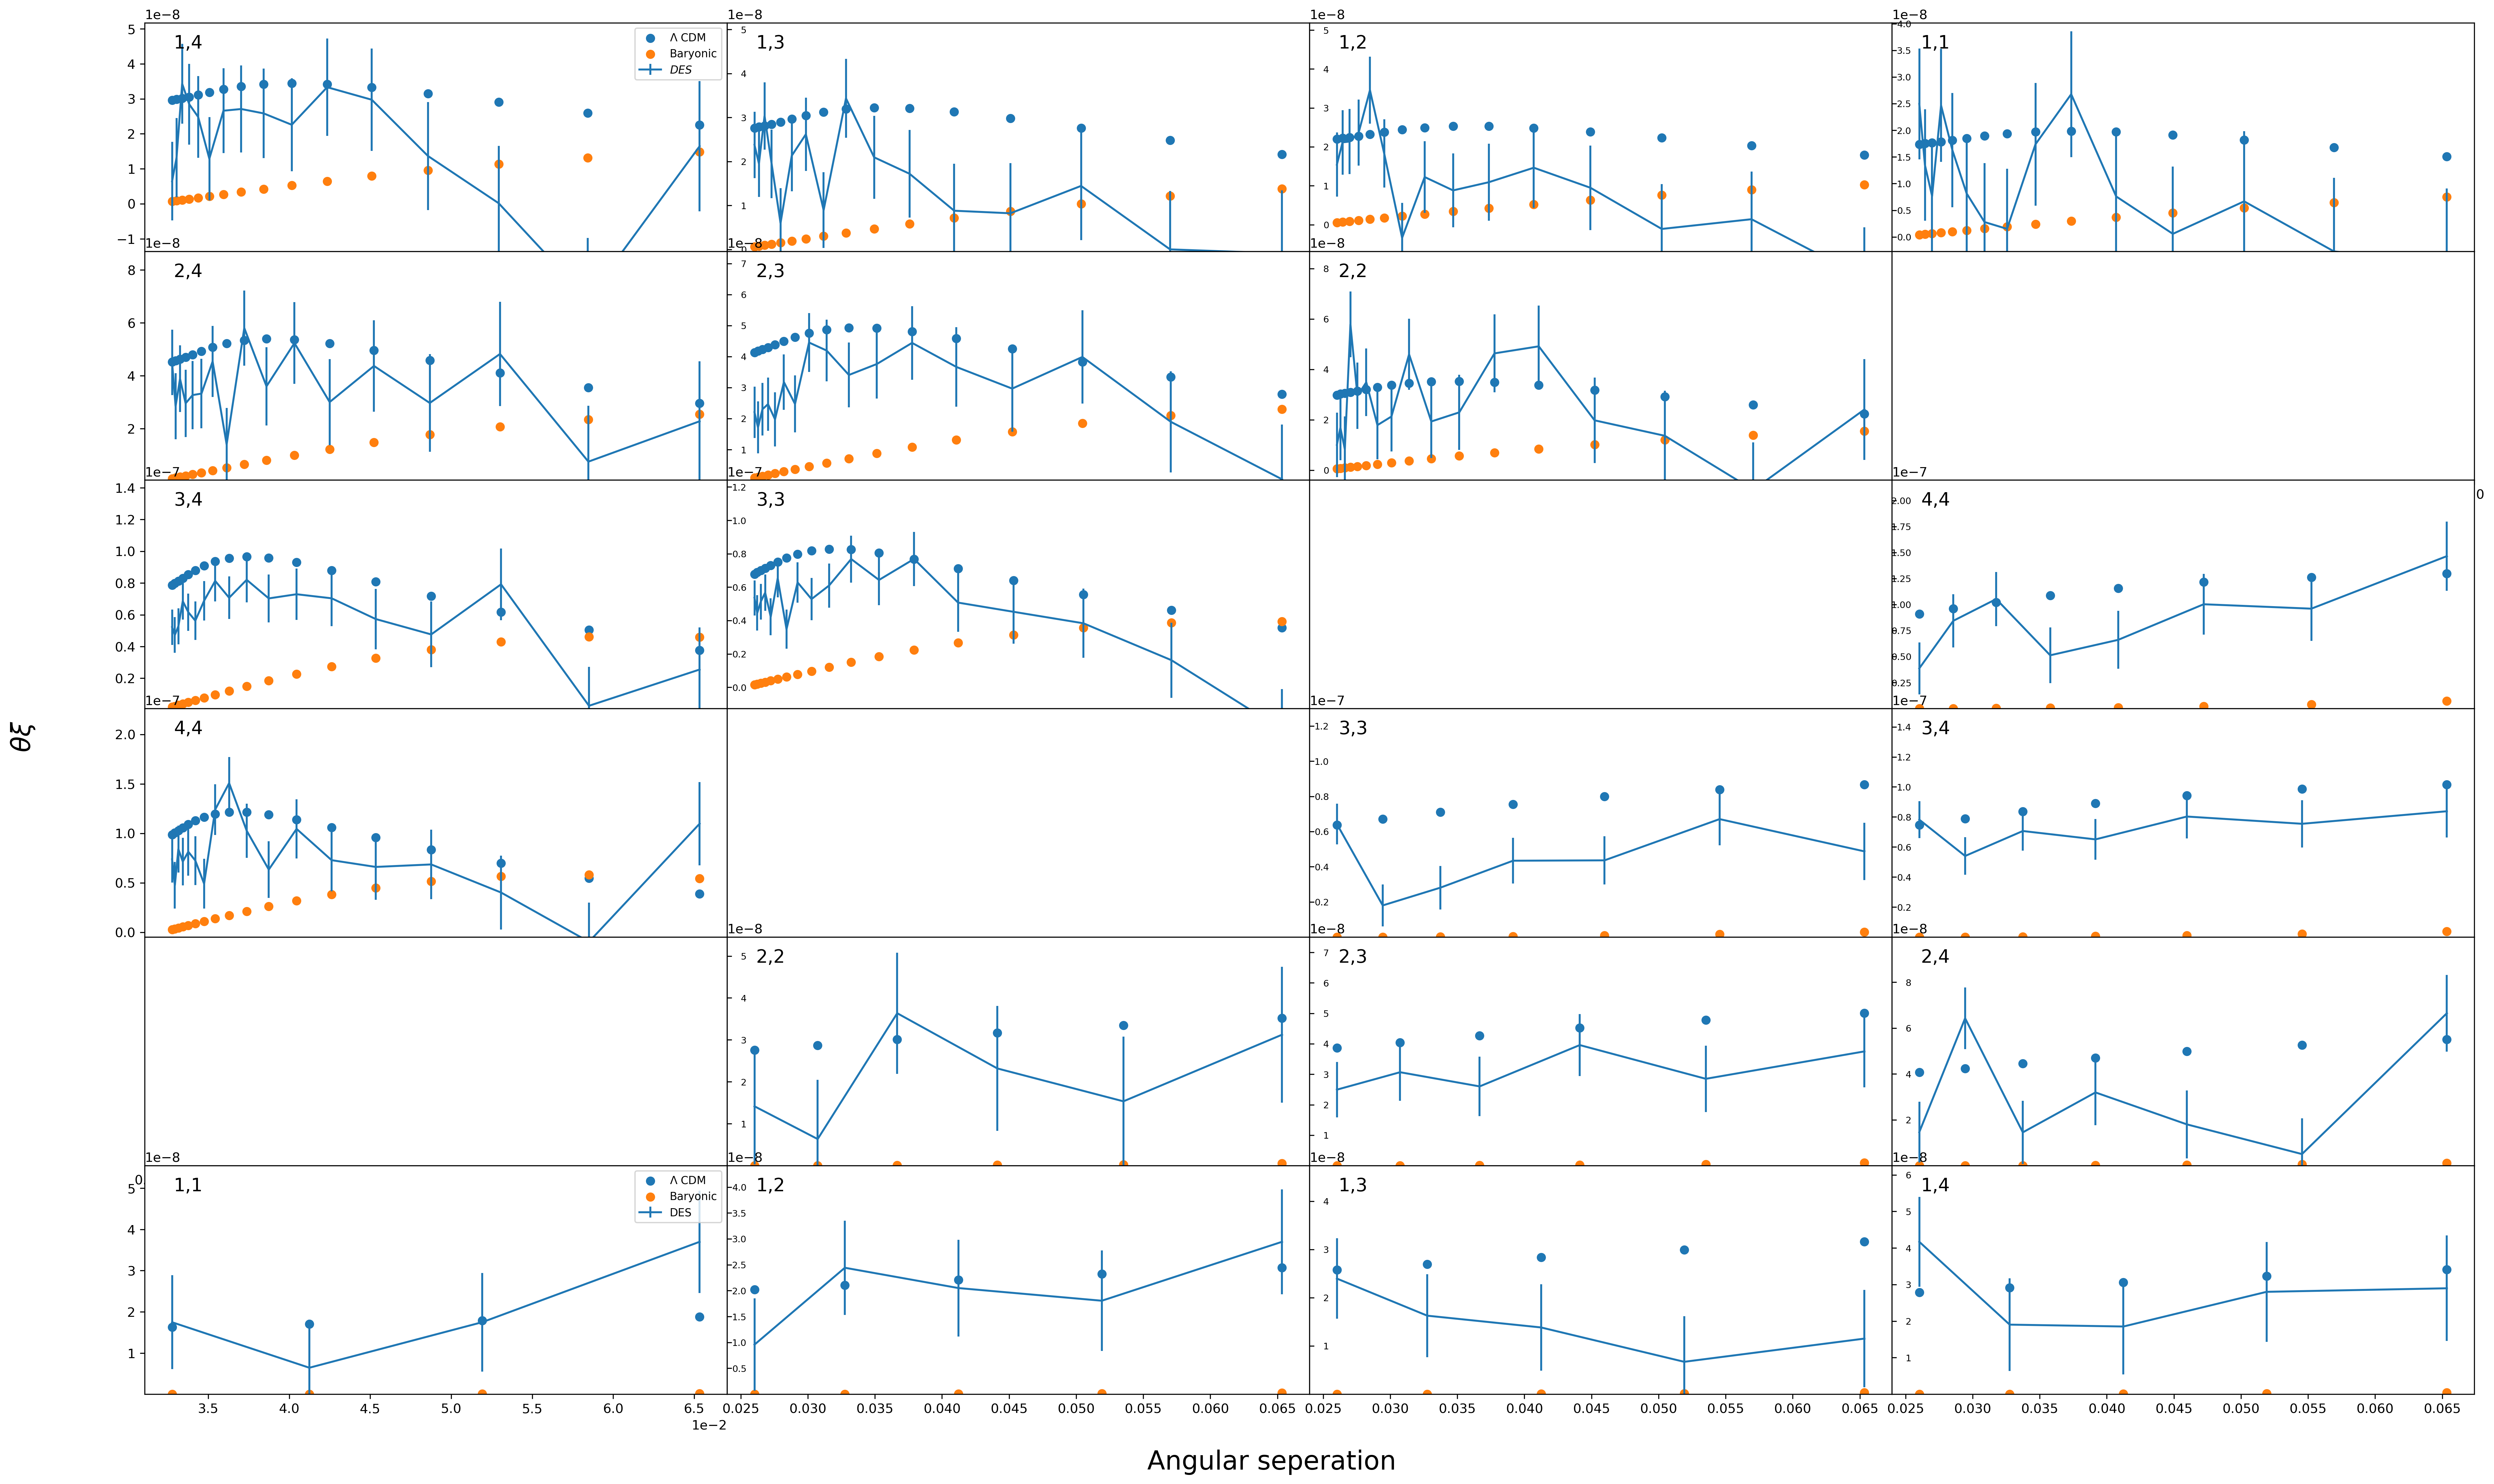

In [28]:
fig,axes=plt.subplots(6,4,figsize=(32,20),dpi=300)
plt.subplots_adjust(bottom=0.15, wspace=0.00,hspace=0.00)


fig.text(0.5, 0.11, 'Angular seperation', ha='center',fontsize=20)
fig.text(0.08, 0.5, r'$\theta \xi$', va='center', rotation='vertical',fontsize=20)

for j in range(4):
    axes[4-j,j].set_yticks([])

for i in range(4):
    for j in range(4):
        
        if j>=i:
        
            x=3-j
            y=i
            

            data = np.array([vec for vec in vec_p if vec[0]==i+1 and vec[1]==j+1])


            angle = data[:,2]
            xi_data=data[:,3]*angle
            xi_theory=data[:,4]*angle
            xi_theory1=data[:,5]*angle
            xi_err=data[:,6]*angle
            

            axes[y,x].errorbar(angle,xi_data,yerr=xi_err,label=r"$DES$")
            axes[y,x].scatter(angle,xi_theory,label=r"$\Lambda$ CDM")
            axes[y,x].scatter(angle,xi_theory1,label=r"Baryonic")
            axes[y,x].set_ylim(0.5*min(np.concatenate([xi_data,xi_theory,xi_theory1])),1.5*max(np.concatenate([xi_data,xi_theory,xi_theory1])))
            if (x,y)==(0,0):
                axes[y,x].legend(fontsize="small")
            
            if x==0:
                axes[y,x].ticklabel_format(axis='both', style='sci', scilimits=(-1,1))
            else:
                axes[y,x].tick_params(axis="y",direction="in",pad=-15,labelsize=7)
                
            props = dict(boxstyle='round', facecolor='b', alpha=0)

            axes[y,x].text(0.05, 0.95, "{},{}".format(i+1,j+1), transform=axes[y,x].transAxes, fontsize=14,
                    verticalalignment='top', bbox=props)
            
for i in range(4):
    for j in range(4):
        
        if j>=i:
        
            x=j
            y=5-i
            

            data = np.array([vec for vec in vec_m if vec[0]==i+1 and vec[1]==j+1])


            angle = data[:,2]
            xi_data=data[:,3]*angle
            xi_theory=data[:,4]*angle
            xi_theory1=data[:,5]*angle
            xi_err=data[:,6]*angle
            

            axes[y,x].errorbar(angle,xi_data,yerr=xi_err,label=r"DES")
            axes[y,x].scatter(angle,xi_theory,label=r"$\Lambda$ CDM")
            axes[y,x].scatter(angle,xi_theory1,label=r"Baryonic")
            axes[y,x].set_ylim(0.5*min(np.concatenate([xi_data,xi_theory,xi_theory1])),1.5*max(np.concatenate([xi_data,xi_theory,xi_theory1])))
            
            axes[5,0].legend(fontsize="small")
            
            if x==0:
                axes[y,x].ticklabel_format(axis='both', style='sci', scilimits=(-1,1))
            else:
                axes[y,x].tick_params(axis="y",direction="in",pad=-15,labelsize=7)
                
            props = dict(boxstyle='round', facecolor='b', alpha=0)

            axes[y,x].text(0.05, 0.95, "{},{}".format(i+1,j+1), transform=axes[y,x].transAxes, fontsize=14,
                    verticalalignment='top', bbox=props)
            


It seems that DES' data have a pretty good fit with the $\Lambda$CDM model except. It surprising to me that $\xi_{-}$ of the baryonic matter only universe is close to zero. I wonder why is that so? 

For $\Lambda$CDM and baryonic respectively:

```
2pt_chi2 = 291.6781063266292
2pt_log_det = -6342.061170802451
2pt_norm = 3171.0305854012254

2pt_chi2 = 561.9570860951376
2pt_log_det = -6342.061170802451
2pt_norm = 3171.0305854012254

```

### Supernova

In [45]:
u_data=np.loadtxt(data_dir+"pantheon_data.txt")
u_data1=np.loadtxt(data1_dir+"pantheon_data.txt")
u_theory=np.loadtxt(data_dir+"pantheon_theory.txt")
u_theory1=np.loadtxt(data1_dir+"pantheon_theory.txt")
u_error=np.sqrt(np.diag(np.loadtxt(data1_dir+"pantheon_covariance.txt")))

z=np.loadtxt(cosmosis+"/data/COSMOLOGY_INPUTS/lcparam_DESonly.txt")[:,1]

Text(0, 0.5, 'Distance Modulus $\\mu$')

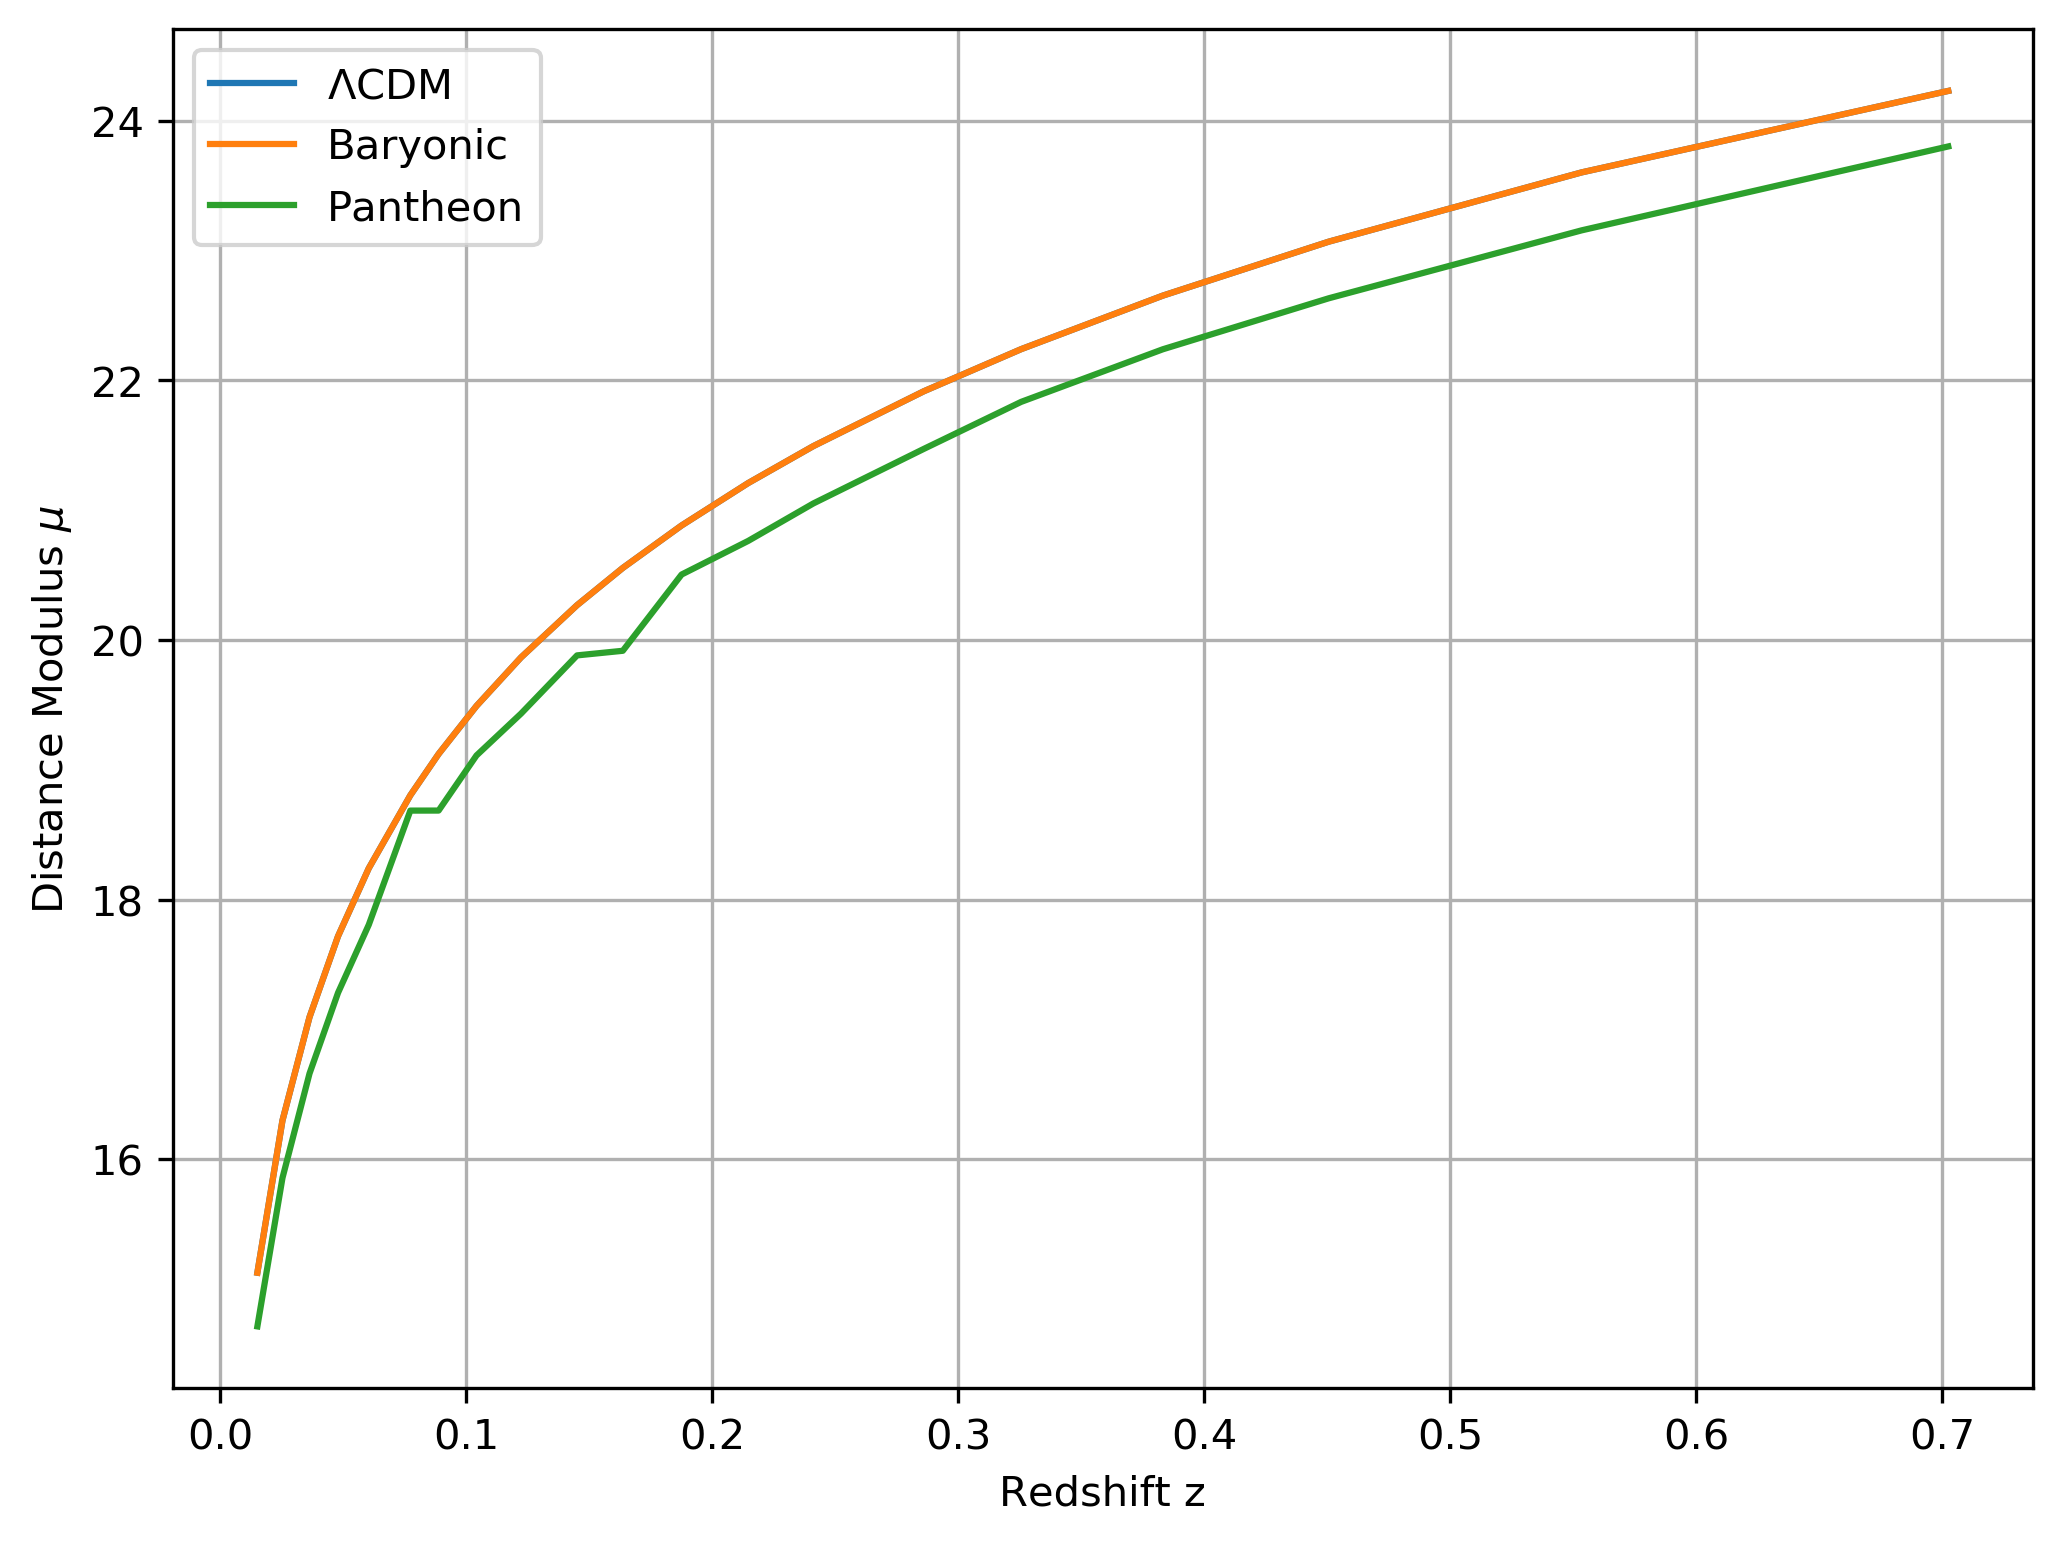

In [48]:
var="mu"
fig, ax = plt.subplots(figsize=(8,6),dpi=300)
ax.plot(z,u_theory,label="$ \Lambda$CDM")
ax.plot(z,u_theory1,label="Baryonic")
ax.errorbar(z,u_data,label="Pantheon")
ax.grid()
ax.legend()
ax.set_xlabel(name_dict["z"])
ax.set_ylabel(name_dict[var])

In [51]:
np.diag(np.loadtxt(data_dir+"pantheon_covariance.txt"))

array([9.9800100e+05, 9.9800100e+05, 9.9800100e+05, 9.9800100e+05,
       9.9800100e+05, 1.1970410e-02, 9.9800100e+05, 1.7647190e-02,
       9.9800100e+05, 2.1895675e-03, 5.0963850e-03, 1.1522850e-03,
       1.2328025e-03, 7.4519500e-04, 9.8437250e-04, 3.2460500e-04,
       6.6811750e-04, 6.1169750e-04, 8.6948000e-04, 1.3588525e-03])

For $\Lambda$CDM and baryonic respectively:
```
pantheon_chi2 = 2589.842898478964
pantheon_log_det = 0.0
pantheon_norm = -0.0
pantheon_chi2 = 2589.842898478964
pantheon_log_det = 0.0
pantheon_norm = -0.0
```

## Likelihood analysis